In [2]:
%matplotlib inline
import pandas as pd # Import the pandas library and assign it the alias pd

import matplotlib.pyplot as plt # Import the pyplot module from the matplotlib library and assign it the alias plt


In [5]:
# Read the CSV file
# The CSV file is read using pd.read_csv() and stored in the DataFrame df.
df = pd.read_csv('Resources/tech_survey.csv')

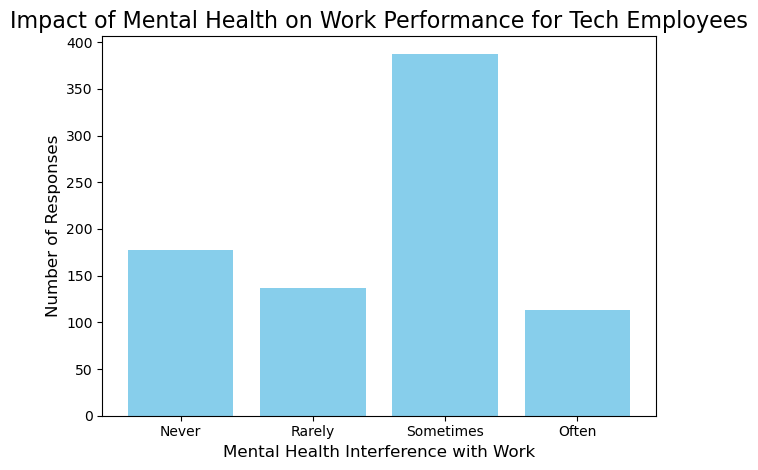

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is the DataFrame with the survey data
# Step 1: Filter responses to include only tech employees
tech_employees_df = df[df['tech_company'] == 'Yes']

# Step 2: Drop NaN values in 'work_interfere' to focus on meaningful responses
tech_employees_df = tech_employees_df.dropna(subset=['work_interfere'])

# Step 3: Get value counts for 'work_interfere' and order them
work_interfere_counts = tech_employees_df['work_interfere'].value_counts().reindex(['Never', 'Rarely', 'Sometimes', 'Often'], fill_value=0)

# Step 4: Plot using matplotlib
plt.bar(work_interfere_counts.index, work_interfere_counts.values, color='skyblue')

# Step 5: Customize the chart
plt.title('Impact of Mental Health on Work Performance for Tech Employees', fontsize=16)
plt.xlabel('Mental Health Interference with Work', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


Examine the Rate of Mental Health Treatment

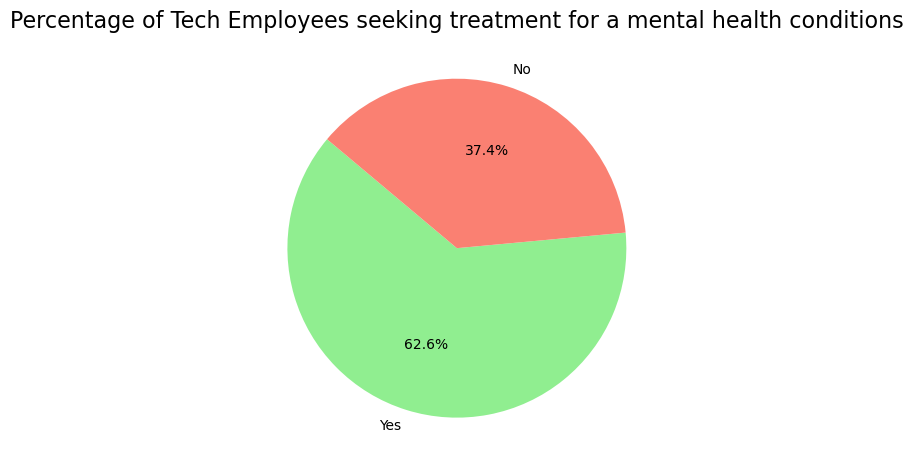

In [6]:
# Step 2: Drop NaN values in 'treatment' to focus on meaningful responses
tech_employees_df = tech_employees_df.dropna(subset=['treatment'])

# Step 3: Get value counts for 'treatment'
treatment_counts = tech_employees_df['treatment'].value_counts()

# Step 4: Plot using matplotlib as a pie chart
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'salmon'])

# Step 5: Customize the chart
plt.title('Percentage of Tech Employees seeking treatment for a mental health conditions', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

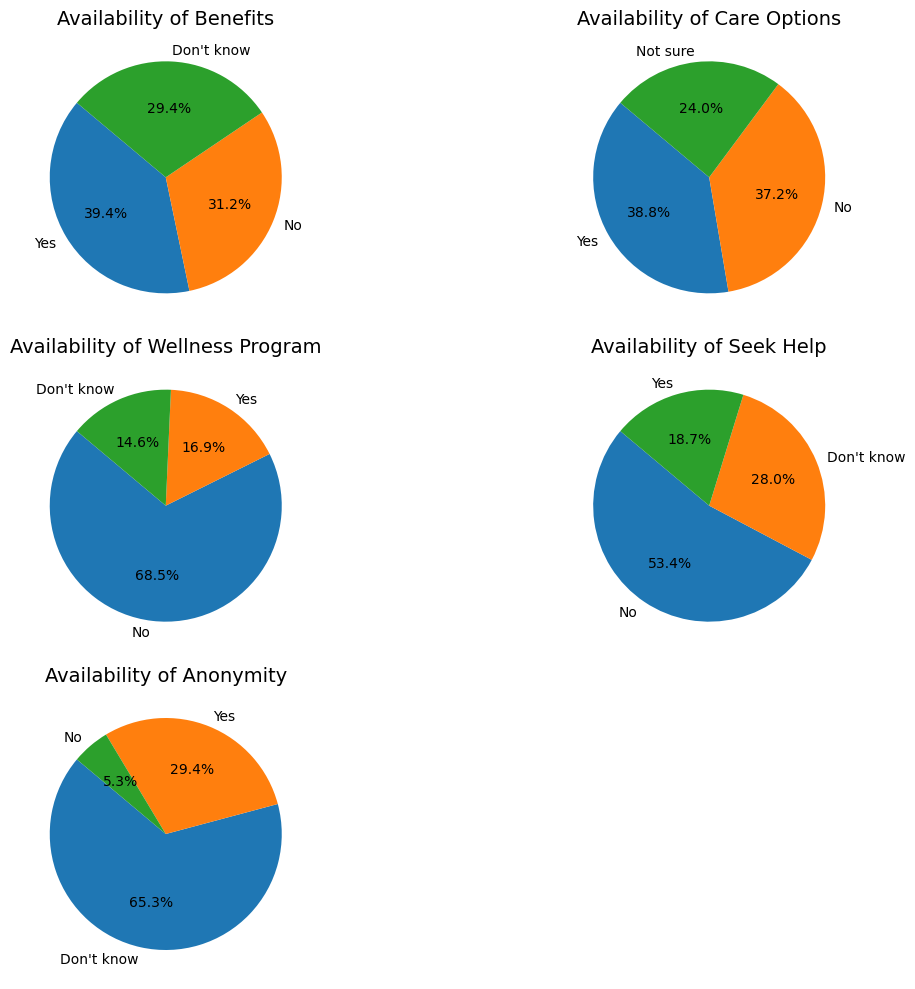

In [7]:
# Step 2: Drop NaN values in the relevant columns to focus on meaningful responses
resource_columns = ['benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity']
tech_employees_df = tech_employees_df.dropna(subset=resource_columns)

# Step 3: Get value counts for each resource-related question
resource_availability = {column: tech_employees_df[column].value_counts() for column in resource_columns}

# Step 4: Plotting the availability of mental health resources using subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Colors for Yes/No responses
colors = ['lightgreen', 'salmon']

# Step 5: Create pie charts for each resource question
for i, (column, counts) in enumerate(resource_availability.items()):
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Availability of {column.replace("_", " ").title()}', fontsize=14)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Step 6: Adjust layout
plt.tight_layout()
plt.show()

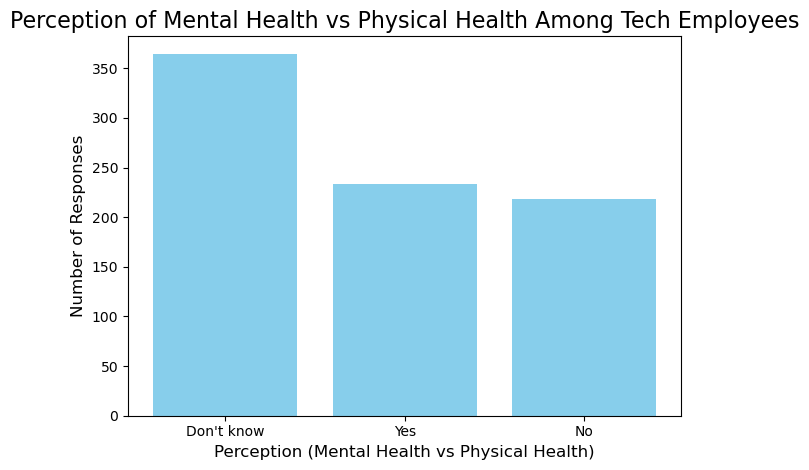

In [8]:
# Step 2: Drop NaN values in 'mental_vs_physical' to focus on meaningful responses
tech_employees_df = tech_employees_df.dropna(subset=['mental_vs_physical'])

# Step 3: Get value counts for 'mental_vs_physical'
mental_vs_physical_counts = tech_employees_df['mental_vs_physical'].value_counts()

# Step 4: Plotting the results using a bar chart
plt.bar(mental_vs_physical_counts.index, mental_vs_physical_counts.values, color='skyblue')

# Step 5: Customize the chart
plt.title('Perception of Mental Health vs Physical Health Among Tech Employees', fontsize=16)
plt.xlabel('Perception (Mental Health vs Physical Health)', fontsize=12)
plt.ylabel('Number of Responses', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

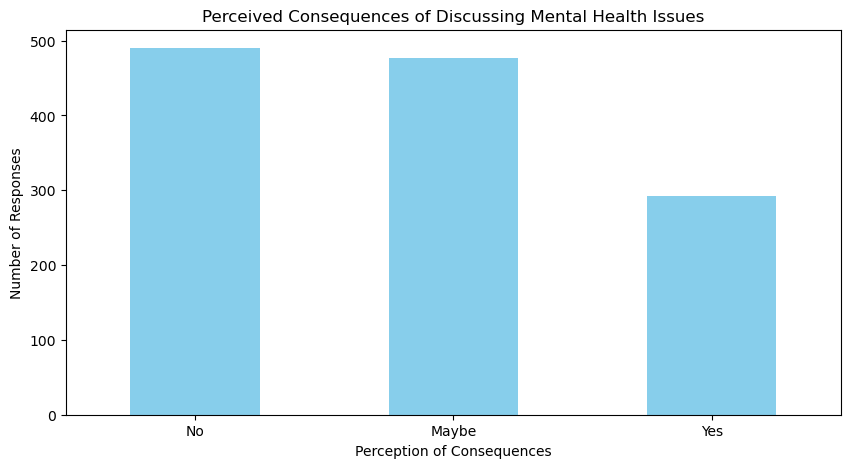

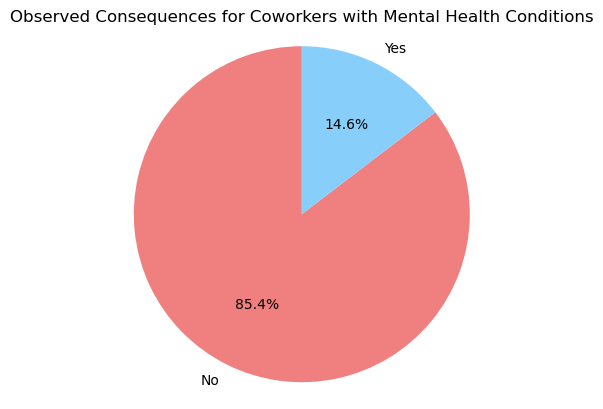

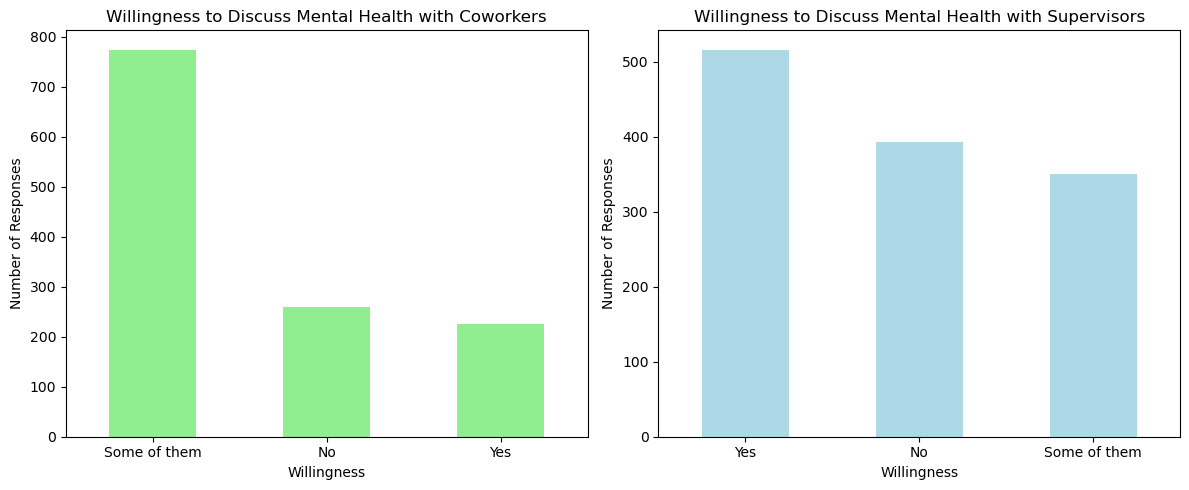

In [23]:
# Step 2: Filter relevant data
stigma_data = df[['mental_health_consequence', 'obs_consequence', 'coworkers', 'supervisor']]

# Step 3: Analyze Stigmatization
# Count responses for mental health consequences
stigma_counts = stigma_data['mental_health_consequence'].value_counts()

# Create a bar chart for mental health consequences
plt.figure(figsize=(10, 5))
stigma_counts.plot(kind='bar', color='skyblue')
plt.title('Perceived Consequences of Discussing Mental Health Issues')
plt.xlabel('Perception of Consequences')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.show()

# Step 4: Analyze Observed Consequences
# Count observed consequences for coworkers
observed_counts = stigma_data['obs_consequence'].value_counts()

# Create a pie chart for observed consequences
observed_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Observed Consequences for Coworkers with Mental Health Conditions')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Optional: Analyze willingness to discuss with coworkers and supervisors
willingness_counts_coworkers = stigma_data['coworkers'].value_counts()
willingness_counts_supervisor = stigma_data['supervisor'].value_counts()

# Create side-by-side bar charts for willingness to discuss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
willingness_counts_coworkers.plot(kind='bar', color='lightgreen')
plt.title('Willingness to Discuss Mental Health with Coworkers')
plt.xlabel('Willingness')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
willingness_counts_supervisor.plot(kind='bar', color='lightblue')
plt.title('Willingness to Discuss Mental Health with Supervisors')
plt.xlabel('Willingness')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

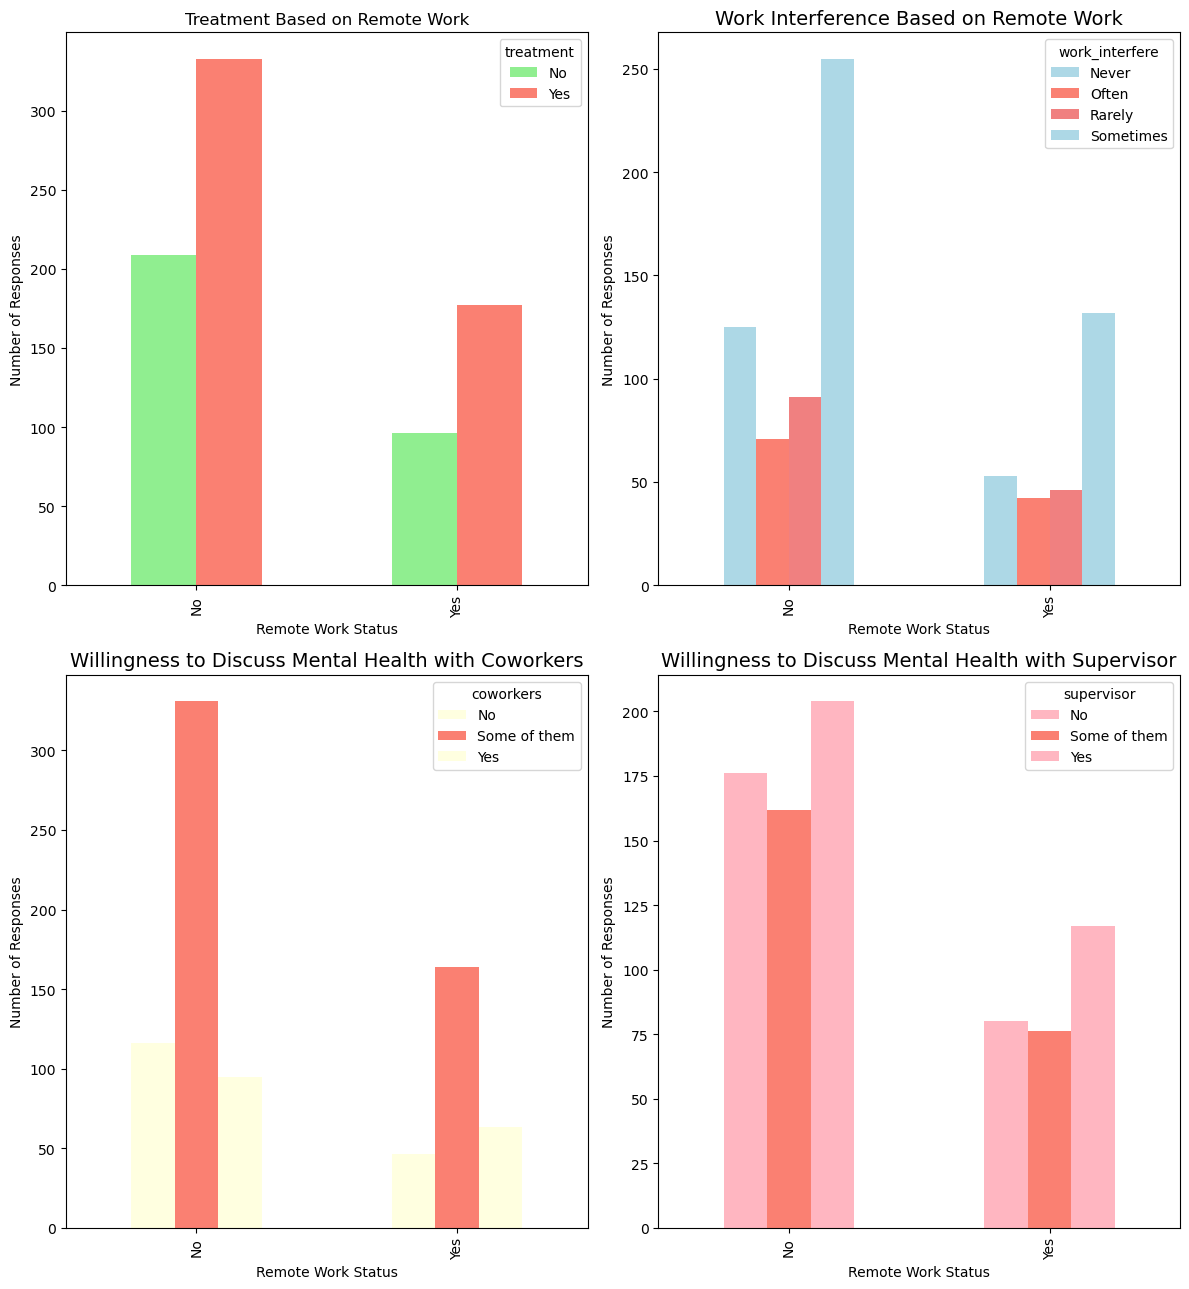

In [24]:
# Step 2: Drop NaN values in relevant columns to focus on meaningful responses
mental_health_columns = ['remote_work', 'treatment', 'work_interfere', 'coworkers', 'supervisor']
tech_employees_df = tech_employees_df.dropna(subset=mental_health_columns)

# Step 3: Count responses for treatment based on remote work status
treatment_counts = tech_employees_df.groupby('remote_work')['treatment'].value_counts().unstack(fill_value=0)

# Step 4: Count responses for work interference based on remote work status
work_interfere_counts = tech_employees_df.groupby('remote_work')['work_interfere'].value_counts().unstack(fill_value=0)

# Step 5: Count willingness to discuss mental health based on remote work status
coworkers_counts = tech_employees_df.groupby('remote_work')['coworkers'].value_counts().unstack(fill_value=0)
supervisor_counts = tech_employees_df.groupby('remote_work')['supervisor'].value_counts().unstack(fill_value=0)

# Step 6: Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 13))

# Treatment plot
treatment_counts.plot(kind='bar', ax=axes[0, 0], color=['lightgreen', 'salmon'])
axes[0, 0].set_title('Treatment Based on Remote Work')
axes[0, 0].set_ylabel('Number of Responses')
axes[0, 0].set_xlabel('Remote Work Status')

# Work Interference plot
work_interfere_counts.plot(kind='bar', ax=axes[0, 1], color=['lightblue', 'salmon', 'lightcoral'])
axes[0, 1].set_title('Work Interference Based on Remote Work', fontsize=14)
axes[0, 1].set_ylabel('Number of Responses')
axes[0, 1].set_xlabel('Remote Work Status')

# Willingness to Discuss with Coworkers plot
coworkers_counts.plot(kind='bar', ax=axes[1, 0], color=['lightyellow', 'salmon'])
axes[1, 0].set_title('Willingness to Discuss Mental Health with Coworkers', fontsize=14)
axes[1, 0].set_ylabel('Number of Responses')
axes[1, 0].set_xlabel('Remote Work Status')

# Willingness to Discuss with Supervisor plot
supervisor_counts.plot(kind='bar', ax=axes[1, 1], color=['lightpink', 'salmon'])
axes[1, 1].set_title('Willingness to Discuss Mental Health with Supervisor', fontsize=14)
axes[1, 1].set_ylabel('Number of Responses')
axes[1, 1].set_xlabel('Remote Work Status')


# Step 7: Adjust layout
plt.tight_layout()
plt.show()

